In [134]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from math import exp

# Problem 1
## 1.1

In [135]:
housing_data = scipy.io.loadmat("data/housing_data.mat")

In [136]:
raw_x_train = pd.DataFrame(housing_data['Xtrain'])
raw_y_train = pd.DataFrame(housing_data['Ytrain'])
raw_x_validate = pd.DataFrame(housing_data['Xvalidate'])
raw_y_validate = pd.DataFrame(housing_data['Yvalidate'])
print(raw_x_train.shape, raw_y_train.shape)
print( raw_x_validate.shape,raw_y_validate.shape)

(19440, 8) (19440, 1)
(1200, 8) (1200, 1)


In [137]:
raw_x_train[9] = 1
raw_x_validate[9] = 1
print(raw_x_train.shape, raw_y_train.shape)
print(raw_x_validate.shape, raw_y_validate.shape)

(19440, 9) (19440, 1)
(1200, 9) (1200, 1)


In [138]:
raw_x_train.head()

,0,1,2,3,4,5,6,7,9
0,2.9241,32,1083,188,471,178,38.04,-121.11,1
1,4.8993,34,3306,555,1398,585,37.99,-122.55,1
2,5.0528,26,2256,360,937,372,38.13,-121.30,1
3,6.0634,15,1834,330,841,309,33.68,-117.78,1
4,1.7500,27,471,132,315,96,33.81,-118.18,1


In [139]:
X = raw_x_train.values
y = raw_y_train.values
x_val = raw_x_validate.values
y_val = raw_y_validate.values
w = np.zeros((1,8))

In [140]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print(w.reshape((9,)))
y_hat = np.dot(x_val,w)

[  4.05879986e+04   1.19561189e+03  -8.50145688e+00   1.18352188e+02
  -3.77900280e+01   4.30562637e+01  -4.21794075e+04  -4.24573474e+04
  -3.56686439e+06]


## 1.2

In [141]:
rss = np.sum((y_val - y_hat) ** 2)
tss = np.sum((y_val - np.mean(y_val)) ** 2)
r_sqrd = 1 - (rss/tss)
print("RSS: %i" % rss)
print("R^2: %.3f" % r_sqrd)
print("Range of y Hat Values => Min: %i Max: %i" %(min(y_hat), max(y_hat)))
print("Range of True Y Values => Min: %i Max: %i" %(min(y_val), max(y_val)))

RSS: 5794953797676
R^2: 0.643
Range of y Hat Values => Min: -56562 Max: 710798
Range of True Y Values => Min: 28300 Max: 500001


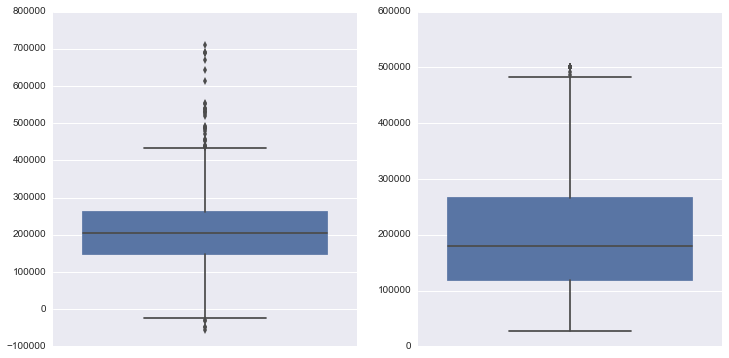

In [142]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True)
sns.boxplot(y_hat, orient='v', ax=axes[0])
sns.boxplot(y_val, orient='v', ax=axes[1])

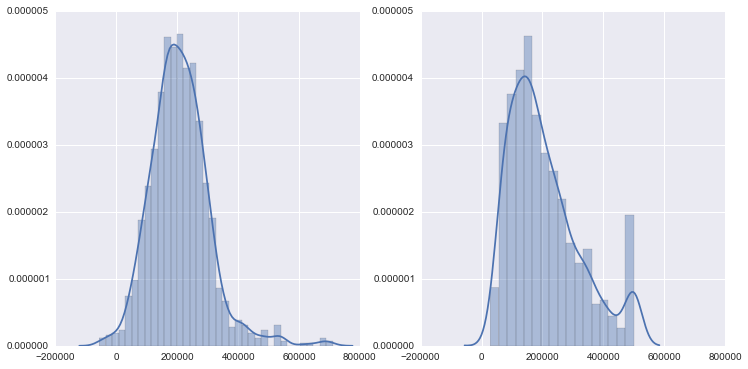

In [143]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True)
sns.distplot(y_hat, ax=axes[0])
sns.distplot(y_val, ax=axes[1])

## 1.3

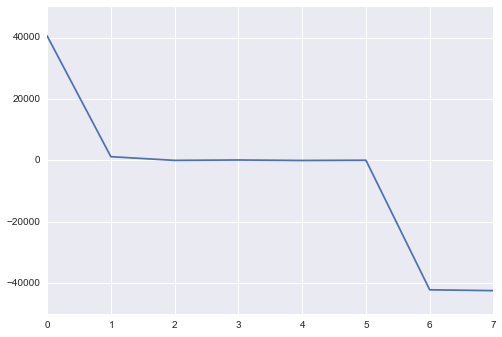

In [144]:
pd.Series(w.reshape((9,))[:8]).plot() # without bias value

## 1.4

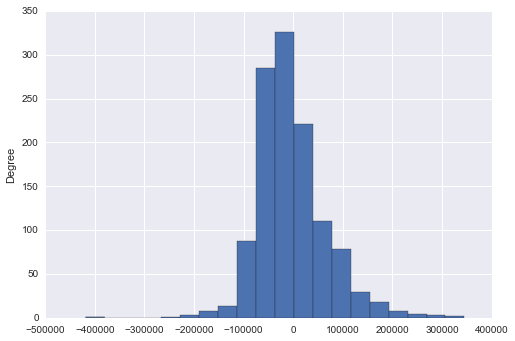

In [145]:
pd.Series((y_val - y_hat).reshape((1200,))).plot(kind='hist', bins=20)

This resembles the normal distribution! This is what we want out of our residuals - that our errors are drawn from a normal distribution and there isn't really any discernable patterns beyond the fact that no error is most common and large errors are rare.

# Problem 2

## 2.3

In [146]:
X = np.array([
        [0,3,1],
        [1,3,1],
        [0,1,1],
        [1,1,1]
    ])
y = np.array([1,1,-1,-1])

In [147]:
def log_func(x):
    return 1 / (1 + np.exp(-x))

def descend(X, y, w, alpha):
    Q = np.dot(np.diag(y), X)
    z = np.dot(Q, w)
    top = np.exp(-z)
    bottom = 1 + np.exp(-z)
    combo = (np.dot(-Q.T, (top/bottom)))
    return w - alpha * combo

In [148]:
w_0 = np.array([-2,1,0])
w_0_pred = log_func(np.dot(X, w_0))
print(w_0)
print(w_0_pred)
print("---- end w_0 ----")
w_1 = descend(X, y, w_0, 1)
w_1_pred = log_func(np.dot(X, w_1))
print(w_1)
print(w_1_pred)
print("---- end w_1 ----")
w_2 = descend(X, y, w_1, 1)
w_2_pred = log_func(np.dot(X, w_2))
print(w_2)
print(w_2_pred)
print("---- end w_2 ----")

[-2  1  0]
[ 0.95257413  0.73105858  0.73105858  0.26894142]
---- end w_0 ----
[-2.          0.94910188 -0.68363271]
[ 0.89693957  0.54082713  0.56598026  0.15000896]
---- end w_1 ----
[-1.69083609  1.91981257 -0.83738862]
[ 0.99276849  0.96199213  0.74695242  0.35242149]
---- end w_2 ----


# Problem 3

### Transformations

In [149]:
def standardize_cols(X):
    zscore = lambda x: (x.mean() - x)/x.std()
    return pd.DataFrame(X).apply(zscore).values

def binarize_cols(X):
    temp = X.copy()
    temp[temp > 0] = 1
    temp[temp <= 0] = 0
    return temp

In [154]:
spam_data = scipy.io.loadmat("data/spam.mat")
Xraw = pd.DataFrame(spam_data['Xtrain'])
y = spam_data['Ytrain'].reshape((3450,))
Xtestraw = pd.DataFrame(spam_data['Xtest'])
print(Xraw.shape, y.shape, Xtestraw.shape)

stan_X = pd.DataFrame(standardize_cols(Xraw.values))
log_X = pd.DataFrame(np.log(Xraw.values + 0.1))
bin_X = pd.DataFrame(binarize_cols(X))
stan_X[57] = 1
log_X[57] = 1
bin_X[57] = 1
Xraw[57] = 1
X = Xraw.values
stan_X = stan_X.values
log_X = log_X.values
bin_X = bin_X.values
print(X.shape, stan_X.shape, log_X.shape, bin_X.shape)

(3450, 57) (3450,) (1151, 57)
(3450, 58) (3450, 58) (3450, 58) (3450, 58)


## 3.1

In [155]:
def batch_gradient_descent(Q, w, alpha):
    z = np.dot(Q, w)
    top = np.exp(-z)
    bottom = 1 + np.exp(-z)
    combo = (np.dot(-Q.T, (top/bottom)))
    risk = np.sum(np.log(1 + np.exp(-z)))
    return w - alpha * combo / len(X), risk

def batch_wrapper(X, y, alpha, num_iters):
    w = np.zeros(len(X[0, :]))
    Q = np.dot(np.diag(y), X)
    risks = []
    for count in range(num_iters):
        new_w, risk = batch_gradient_descent(Q, w, alpha)
        risks.append(risk)
        w = new_w
    return w, pd.DataFrame(risks)

In [156]:
alpha = 0.005
num_iters = 5000

In [157]:
w2, risks2 = batch_wrapper(stan_X, y, alpha, num_iters)
w3, risks3 = batch_wrapper(log_X, y, alpha, num_iters)
w4, risks4 = batch_wrapper(bin_X, y, alpha, num_iters)

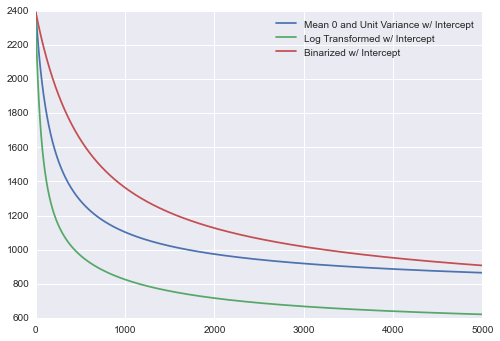

In [158]:
all_risks = pd.concat([risks2, risks3, risks4], axis=1)
all_risks.columns = ['Mean 0 and Unit Variance w/ Intercept', 'Log Transformed w/ Intercept', 'Binarized w/ Intercept']
all_risks.plot()

## 3.2

In [159]:
from random import shuffle
def stochastic_gradient_descent(Q, w, alpha):
    z = np.dot(Q, w)
    top = np.exp(-z)
    bottom = 1 + top
    combo = (np.dot(-Q.T, (top/bottom)))
    risk = np.sum(np.log(1 + top))
    return w - (alpha/len(X)) * combo, risk

def stochastic_wrapper(X, y, alpha, num_iters):
    shuff = list(range(len(X)))
    shuffle(shuff)
    w = np.zeros(len(X[0,:]))
    X = X[shuff]
    y = y[shuff]
    Q = np.dot(np.diag(y), X)
    risks = []
    for count in range(num_iters):
        temp_risk = []
        for q in Q:
            new_w, risk = stochastic_gradient_descent(q, w, alpha)
            temp_risk.append(risk)
            w = new_w
        risks.append(sum(temp_risk))
    return w, pd.DataFrame(risks)

In [160]:
alpha = 0.05
num_iters = 1000

In [161]:
w2, risks2 = stochastic_wrapper(stan_X, y, alpha, num_iters)
w3, risks3 = stochastic_wrapper(log_X, y, alpha, num_iters)
w4, risks4 = stochastic_wrapper(bin_X, y, alpha, num_iters)

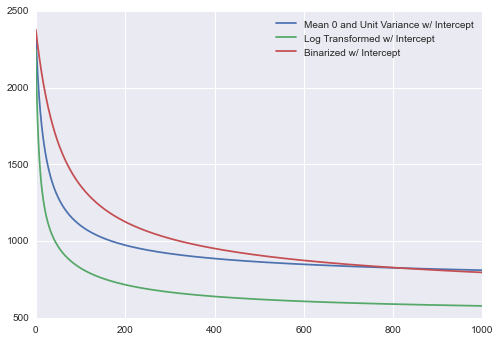

In [162]:
all_risks = pd.concat([risks2,risks3,risks4], axis=1)
all_risks.columns = ['Mean 0 and Unit Variance w/ Intercept', 'Log Transformed w/ Intercept', 'Binarized w/ Intercept']
all_risks.plot()

## 3.3

In [163]:
from random import shuffle
def stochastic_gradient_descent(Q, w, alpha):
    z = np.dot(Q, w)
    top = np.exp(-z)
    bottom = 1 + np.exp(-z)
    combo = (np.dot(-Q.T, (top/bottom)))
    risk = np.sum(np.log(1 + np.exp(-z)))
    return w - (alpha/len(X)) * combo, risk

def stochastic_auto_alpha_wrapper(X, y, num_iters):
    shuff = list(range(len(X)))
    shuffle(shuff)
    w = np.zeros(len(X[0,:]))
    X = X[shuff]
    y = y[shuff]
    Q = np.dot(np.diag(y), X)
    risks = []
    for count in range(num_iters):
        alpha = 1/(count + 1)
        temp_risk = []
        for q in Q:
            new_w, risk = stochastic_gradient_descent(q, w, alpha)
            temp_risk.append(risk)
            w = new_w
        risks.append(sum(temp_risk))
    return w, pd.DataFrame(risks)

In [164]:
num_iters = 5000
w2, risks2 = stochastic_auto_alpha_wrapper(stan_X, y, num_iters)
w3, risks3 = stochastic_auto_alpha_wrapper(log_X, y, num_iters)
w4, risks4 = stochastic_auto_alpha_wrapper(bin_X, y, num_iters)

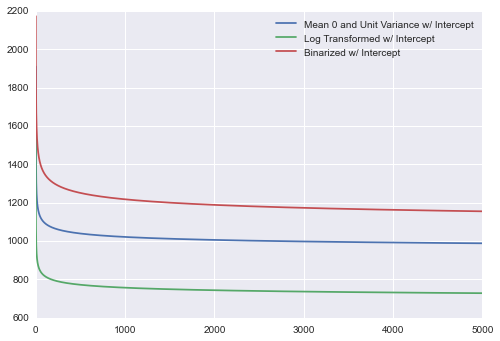

In [165]:
all_risks = pd.concat([risks2,risks3,risks4], axis=1)
all_risks.columns = ['Mean 0 and Unit Variance w/ Intercept', 'Log Transformed w/ Intercept', 'Binarized w/ Intercept']
all_risks.plot()

Yes this does seem to be better because we are converging in smaller steps towards the end of our iterations. This allows us to slow down our rate of change, increasing the likelihood that we won't jump out of the bowl that we are in.

## 3.4.b

# Problem 4